In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D ,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Bidirectional

In [ ]:
drive.flush_and_unmount()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fake=pd.read_csv('drive/MyDrive/Fake.csv')
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
#wordcloud

In [ ]:
text=' '.join(fake['text'].tolist())

In [ ]:
wordcloud=WordCloud().generate(text)

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


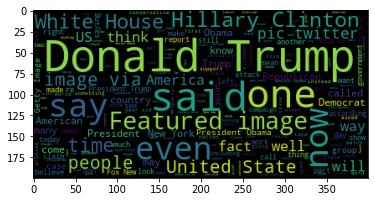

In [ ]:
plt.imshow(wordcloud)

In [ ]:
real=pd.read_csv('drive/MyDrive/True.csv')
real.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
unknown_publishers=[]
for index,row in enumerate(real.text.values):
    try:
          record=row.split('-',maxsplit=1)
          record[1]
          assert(len(record[0])<120)
    except:
          unknown_publishers.append(index)


In [ ]:
len(unknown_publishers)

222

In [ ]:
real.drop(8970,axis=0)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
real.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
real.iloc[unknown_publishers]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


In [ ]:
publisher=[]
#new column for publcihser infor
tmp_text=[]
for index,row in enumerate(real.text.values):
  if index in unknown_publishers:
      tmp_text.append(row)
      publisher.append('Unknwown')
      continue
  else:
      record=row.split('-',maxsplit=1)
      publisher.append(record[0].strip())
      tmp_text.append(record[1].strip())

In [ ]:
real['publisher']=publisher

In [ ]:
real['text']=tmp_text

In [ ]:
real.shape

(21417, 5)

In [ ]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text']=real['title']+" "+real['text']
fake['text']=fake['title']+" "+fake['text']

In [ ]:
real['text'].apply(lambda x: str(x).lower())
fake['text'].apply(lambda x: str(x).lower())


0         donald trump sends out embarrassing new year’...
1         drunk bragging trump staffer started russian ...
2         sheriff david clarke becomes an internet joke...
3         trump is so obsessed he even has obama’s name...
4         pope francis just called out donald trump dur...
                               ...                        
23476    mcpain: john mccain furious that iran treated ...
23477    justice? yahoo settles e-mail privacy class-ac...
23478    sunnistan: us and allied ‘safe zone’ plan to t...
23479    how to blow $700 million: al jazeera america f...
23480    10 u.s. navy sailors held by iranian military ...
Name: text, Length: 23481, dtype: object

In [ ]:
real['class']=1
fake['class']=0

In [ ]:
real_n=real[['text','class']]
fake_n=fake[['text','class']]

In [ ]:
data=real_n.append(fake_n,ignore_index=True)

In [ ]:
data = data.sample(frac = 1)

In [ ]:
data.head(5)

,text,class
14605,China says 'dual suspension' proposal still be...,1
8347,Congressional leaders ask for more time to stu...,1
8566,"Buffett rebukes Trump, questions his business ...",1
13208,Brexit deal agreed on all Irish issues - Irish...,1
21271,Thailand's Buddhism chief removed after pressu...,1


In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3


     |████████████████████████████████| 12.0 MB 18.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
!pip install git+https://github.com/aparna18cs/preprocessing_nlp_11.git --upgrade --force-reinstall

  Cloning https://github.com/aparna18cs/preprocessing_nlp_11.git to /tmp/pip-req-build-_jlgl9c4
  Running command git clone -q https://github.com/aparna18cs/preprocessing_nlp_11.git /tmp/pip-req-build-_jlgl9c4
  Created wheel for preprocess-aparna18cs: filename=preprocess_aparna18cs-0.0.3-py3-none-any.whl size=3832 sha256=32d987c325a5e4a5aca9bff3647277285624136e7391a76374d49d58df61b878
  Stored in directory: /tmp/pip-ephem-wheel-cache-l96_jeax/wheels/d8/02/2b/eb158497d4686b1e0f74273ba2d46fdd6279a400d5d063c38a
Successfully built preprocess-aparna18cs
  Attempting uninstall: preprocess-aparna18cs
    Found existing installation: preprocess-aparna18cs 0.0.3
    Uninstalling preprocess-aparna18cs-0.0.3:
      Successfully uninstalled preprocess-aparna18cs-0.0.3


In [ ]:
import preprocess_aparna18cs as ps

In [ ]:
data['text']=data['text'].apply(lambda x:ps.remove_special_chars(x))

In [ ]:
import gensim

In [ ]:
y=data['class'].values
x=[]
dd=data['text'].tolist()
for d in dd:
    x.append(d.split())


In [ ]:
type(x)

list

In [ ]:
x[2]

['Buffett',
 'rebukes',
 'Trump',
 'questions',
 'his',
 'business',
 'skill',
 'Billionaire',
 'investor',
 'Warren',
 'Buffett',
 'on',
 'Monday',
 'campaigned',
 'alongside',
 'US',
 'Democratic',
 'presidential',
 'candidate',
 'Hillary',
 'Clinton',
 'at',
 'a',
 'rowdy',
 'rally',
 'in',
 'his',
 'home',
 'state',
 'of',
 'Nebraska',
 'where',
 'he',
 'challenged',
 'Republican',
 'Donald',
 'Trump',
 'to',
 'release',
 'his',
 'tax',
 'returns',
 'and',
 'questioned',
 'Trumps',
 'business',
 'acumen',
 'Trump',
 'a',
 'New',
 'York',
 'real',
 'estate',
 'developer',
 'making',
 'his',
 'first',
 'run',
 'at',
 'public',
 'office',
 'has',
 'said',
 'he',
 'cannot',
 'release',
 'his',
 'tax',
 'returns',
 'a',
 'ritual',
 'of',
 'US',
 'presidential',
 'campaigns',
 'until',
 'the',
 'Internal',
 'Revenue',
 'Service',
 'has',
 'completed',
 'an',
 'audit',
 'Now',
 'Ive',
 'got',
 'news',
 'for',
 'him',
 'said',
 'Buffett',
 'whose',
 'Berkshire',
 'Hathaway',
 'BRKaN',
 'co

In [ ]:
dim=100 # each word will seq of 100 
w2v_model=gensim.models.Word2Vec(sentences=x,size=dim,window=10,min_count=1)



onehot rep

cont....


In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x)


In [ ]:
x=tokenizer.texts_to_sequences(x)

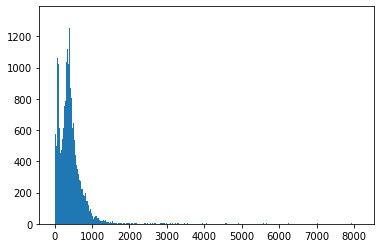

In [ ]:
plt.hist([len(i) for i in x],bins=700)
plt.show()

In [ ]:
maxlen=1000
x=pad_sequences(x,maxlen)

In [ ]:
vocab_size =len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [ ]:

def get_weight_matrix(model):
  weight_matrix=np.zeros((vocab_size,100))
  for word, i in vocab.items():
    try: weight_matrix[i] = model.wv[word]
    except: print(word, 'not found')
  return weight_matrix


In [ ]:
embedding_vectors=get_weight_matrix(w2v_model)
embedding_vectors.shape

Streaming output truncated to the last 5000 lines.
actionsracism not found
seriouslywhen not found
racistwhen not found
affordthat not found
atfeatured not found
percentread not found
soldierstaking not found
nationrep not found
pictwittercomym6v7buaex not found
pictwittercomkxorsbdi7i not found
maritza not found
malkovichdirected not found
brexiting not found
anglofrench not found
tobb not found
agri not found
psychopharmacology not found
colleaguesa not found
emthat not found
fictionfeatured not found
moneydozens not found
protestpresidential not found
pictwittercomuw6kwhdmh0 not found
shannan not found
shannanferry not found
saudirussian not found
yankovich not found
worldjeffrey not found
nimmo not found
futurehis not found
palinthank not found
httpstco2dzp7yoadj not found
pictwittercom2ytllewceb not found
cohenwhile not found
legacyyoutube not found
akhmetshins not found
committeesaid not found
breathei not found
drinkas not found
transpiredwhatever not found
mistakeno not found
t

(231912, 100)

In [ ]:
len(w2v_model.wv.vocab)

266247

In [ ]:
w2v_model.wv.vocab

{'China': <gensim.models.keyedvectors.Vocab at 0x7f8a2478a090>,
 'says': <gensim.models.keyedvectors.Vocab at 0x7f8a24534a50>,
 'dual': <gensim.models.keyedvectors.Vocab at 0x7f8a247e06d0>,
 'suspension': <gensim.models.keyedvectors.Vocab at 0x7f8987953d10>,
 'proposal': <gensim.models.keyedvectors.Vocab at 0x7f8987953190>,
 'still': <gensim.models.keyedvectors.Vocab at 0x7f8a24781710>,
 'best': <gensim.models.keyedvectors.Vocab at 0x7f898795a950>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7f898795aa50>,
 'North': <gensim.models.keyedvectors.Vocab at 0x7f8987953dd0>,
 'Korea': <gensim.models.keyedvectors.Vocab at 0x7f8a2442c710>,
 'said': <gensim.models.keyedvectors.Vocab at 0x7f898795ab10>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7f898795a450>,
 'Thursday': <gensim.models.keyedvectors.Vocab at 0x7f898795abd0>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7f898795ad90>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7f898795a150>,
 'handle': <gensim.models.keyedvectors.Vocab 

In [ ]:
embedding_vectors.shape

(231912, 100)

cont....

In [ ]:
import tensorflow as tf

In [ ]:
loaded_model_from_h5 = tf.keras.models.load_model('drive/MyDrive/Hybrid_New_Model.h5') # Loading the H5 Saved Model
print(loaded_model_from_h5.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23191200  
                                                                 
 lstm_1 (LSTM)               (None, 120)               106080    
                                                                 
Total params: 23,297,280
Trainable params: 106,080
Non-trainable params: 23,191,200
_________________________________________________________________
None


In [ ]:
y_pred=loaded_model_from_h5.predict(x_test)

In [ ]:
print(y_pred[3])

[-0.21268643  0.33680058 -0.25078917  0.06910621  0.15094557 -0.00724775
 -0.05976953 -0.26083958  0.04947084 -0.01147226 -0.04288434 -0.00403725
 -0.00580938 -0.45933545  0.06303439  0.04512821  0.05604296 -0.14689179
  0.01578955  0.07210483  0.18154787 -0.12713484 -0.13875267 -0.15116403
 -0.06501967 -0.10602115  0.2624725  -0.04445804 -0.11143516 -0.24049985
 -0.16668323  0.04812978 -0.6412718   0.04150446 -0.119041   -0.05971099
 -0.04589777  0.17244694  0.26447976  0.09383829 -0.18259075  0.05670014
 -0.0384202  -0.13635433  0.03563792 -0.0731317  -0.20624189  0.0236183
  0.38427097  0.06981249 -0.35901448 -0.08220946 -0.03518776  0.03409168
 -0.07463264 -0.08484207 -0.06550036 -0.10286734 -0.0366239  -0.02540473
 -0.07674056 -0.20963264 -0.19501284  0.05706974  0.17026874  0.17183866
  0.12131692 -0.01624798 -0.1859275   0.10573452  0.10754792  0.17834698
 -0.07361004  0.19263208 -0.07937223  0.00316847 -0.0798552  -0.25498796
  0.10928831  0.0909443  -0.08349591 -0.29048213  0.

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=100,weights=[embedding_vectors],input_length=maxlen,trainable=False))

In [ ]:
model.add(LSTM(units=120))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23191200  
                                                                 
 lstm_1 (LSTM)               (None, 120)               106080    
                                                                 
Total params: 23,297,280
Trainable params: 106,080
Non-trainable params: 23,191,200
_________________________________________________________________


In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y)

In [ ]:
model.fit(x_train,y_train,validation_split=0.3,epochs=1)



737/737 [==============================] - 603s 815ms/step - loss: 0.5711 - acc: 0.0072 - val_loss: 0.2163 - val_acc: 0.0019


In [ ]:
y_pred=model.predict(x_test)

NameError: ignored

In [ ]:
y_pred[0]

array([0.98206   , 0.91979283, 0.9624533 , 0.9505682 , 0.9149084 ,
       0.9492969 , 0.8470773 , 0.98308504, 0.98217684, 0.9352798 ,
       0.9600515 , 0.9521365 , 0.9316934 , 0.9866338 , 0.9554698 ,
       0.9710075 , 0.96884507, 0.94899076, 0.92089397, 0.954891  ,
       0.9454593 , 0.8752305 , 0.96848905, 0.96111536, 0.9458474 ,
       0.9030783 , 0.89155596, 0.95354116, 0.9029957 , 0.97166234,
       0.9717931 , 0.927865  , 0.8721489 , 0.9446279 , 0.9835875 ,
       0.9524347 , 0.9251572 , 0.88469553, 0.9611195 , 0.9515586 ,
       0.93512064, 0.9764663 , 0.96499187, 0.9779166 , 0.9435152 ,
       0.9604201 , 0.993984  , 0.97230566, 0.83800817, 0.9709946 ,
       0.87844765, 0.92281455, 0.94143754, 0.96581864, 0.9339381 ,
       0.9713515 , 0.95431286, 0.9751958 , 0.98268306, 0.9287645 ,
       0.95610607, 0.97218424, 0.93817186, 0.9707132 , 0.88723   ,
       0.95858335, 0.9165182 , 0.95180756, 0.9404098 , 0.98782325,
       0.96894747, 0.86121476, 0.89017856, 0.9631114 , 0.92488

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import tensorflow as tf

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
X_train_prediction = model1.predict(y_pred)
training_data_accuracy = accuracy_score(X_train_prediction, y_test)

In [ ]:
print(training_data_accuracy)

0.9602672605790646


In [ ]:
print(X_train_prediction)

[1 0 0 ... 0 0 0]


In [ ]:
x_train2,x_test2,y_train2,y_test2 =train_test_split(x_train,y_train,test_size=0.05) 

In [ ]:
y_pred2=loaded_model_from_h5.predict(x_test2) # features frm  lstm with secodn test set 

In [ ]:
x_test_prediction2 = model1.predict(y_pred2)
training_data_accuracy = accuracy_score(x_test_prediction2, y_test2)

In [ ]:
print(training_data_accuracy)

0.9608076009501187


In [ ]:
print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f1860f63250>>


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(x_test_prediction2,y_test2)

array([[862,  27],
       [ 39, 756]])

In [ ]:
matrix_c=confusion_matrix(x_test_prediction2,y_test2)

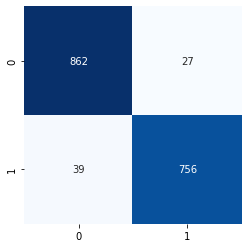

In [ ]:
sns.heatmap(matrix_c,square=True,annot=True,cmap='Blues',fmt='d',cbar=False)

In [ ]:
import pickle

In [ ]:
filename = 'drive/MyDrive/logReg.sav'
pickle.dump(model1, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
print(loaded_model)

LogisticRegression()


In [ ]:
result = loaded_model.score(y_pred2, y_test2)
print(result)

0.9608076009501187


In [ ]:
!mkdir -p saved_model
model.save('drive/MyDrive/HYBRID_FAKENEWS') 

INFO:tensorflow:Assets written to: drive/MyDrive/HYBRID_FAKENEWS/assets


INFO:tensorflow:Assets written to: drive/MyDrive/HYBRID_FAKENEWS/assets


In [ ]:
import pickle

In [ ]:
model1.save('drive/MyDrive/HYBRID_FAKENEWS') 

AttributeError: ignored

In [ ]:
new_model =  tf.keras.models.load_model('drive/MyDrive/HYBRID_FAKENEWS') 

# Check its architecture
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23191200  
                                                                 
 lstm_1 (LSTM)               (None, 120)               106080    
                                                                 
Total params: 23,297,280
Trainable params: 106,080
Non-trainable params: 23,191,200
_________________________________________________________________


In [ ]:
tf.keras.models.save_model(new_model, 'drive/MyDrive/Hybrid_New_Model.h5')

In [ ]:
loaded_model_from_h5 = tf.keras.models.load_model('drive/MyDrive/Hybrid_New_Model.h5') # Loading the H5 Saved Model
print(loaded_model_from_h5.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         23191200  
                                                                 
 lstm_1 (LSTM)               (None, 120)               106080    
                                                                 
Total params: 23,297,280
Trainable params: 106,080
Non-trainable params: 23,191,200
_________________________________________________________________
None


In [ ]:
#########till here  #########################################################

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
(model.predict(x)>=0.5).astype(int)

NameError: ignored

In [ ]:
z=model.predict(t)

In [ ]:
z.shape

(1, 128)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
(model1.predict(x)>=0.5).astype(int)

NameError: ignored

In [ ]:
y_pred1 = (model1.predict(x_test)>=0.5).astype(int)

NameError: ignored

In [ ]:
accuracy_score(y_test, y_pred1)

0.9885968819599109

In [ ]:
model1.predict(t)

NameError: ignored

In [ ]:
pred = model1.predict_classes(x_test)
confusion_matrix(y_test,pred)

NameError: ignored

In [ ]:
#y_pred=model.predict_classes(X_test)
y_pred1=model1.predict(x_test)
#confusion_matrix(y_test,y_pred1)

NameError: ignored

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[5821,   57],
       [  71, 5276]])

In [ ]:
accuracy_score(y_test,y_pred1)

ValueError: ignored

In [ ]:
!mkdir -p saved_model
model.save('drive/MyDrive/my_fake_news_model1') 

INFO:tensorflow:Assets written to: drive/MyDrive/my_fake_news_model1/assets


INFO:tensorflow:Assets written to: drive/MyDrive/my_fake_news_model1/assets


In [ ]:
model1.save('drive/MyDrive/my_fake_news_model2') 

INFO:tensorflow:Assets written to: drive/MyDrive/my_fake_news_model2/assets


INFO:tensorflow:Assets written to: drive/MyDrive/my_fake_news_model2/assets


In [ ]:
new_model =  tf.keras.models.load_model('drive/MyDrive/my_fake_news_model1') 

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23191200  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,308,577
Trainable params: 117,377
Non-trainable params: 23,191,200
_________________________________________________________________


In [ ]:
new_model1 =  tf.keras.models.load_model('drive/MyDrive/my_fake_news_model2') 

# Check its architecture
new_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         22883200  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,117,953
Trainable params: 234,753
Non-trainable params: 22,883,200
_________________________________________________________________


In [ ]:
new_model.predict(t)

array([[0.56229925]], dtype=float32)

In [ ]:
new_model1.predict(t)

array([[0.02971083]], dtype=float32)

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.models.save_model(new_model, 'drive/MyDrive/New_Model_2.h5')

In [ ]:
#!mkdir -p saved_model_
model.save('drive/MyDrive/my_fake_news_model2') 

INFO:tensorflow:Assets written to: drive/MyDrive/my_fake_news_model2/assets


INFO:tensorflow:Assets written to: drive/MyDrive/my_fake_news_model2/assets


In [ ]:
loaded_model_from_h5 = tf.keras.models.load_model('drive/MyDrive/New_Model_2.h5') # Loading the H5 Saved Model
print(loaded_model_from_h5.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23191200  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,308,577
Trainable params: 117,377
Non-trainable params: 23,191,200
_________________________________________________________________
None


In [ ]:

from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text = "Natural language processing (NLP) is a field "
  
print(sent_tokenize(text))
print(word_tokenize(text))

['Natural language processing (NLP) is a field']
['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field']


In [ ]:
text = "Natural language processing (NLP) is a field " + \
       "of computer science, artificial intelligence " + \
       "and computational linguistics concerned with " + \
       "the interactions between computers and human " + \
       "(natural) languages, and, in particular, " + \
       "concerned with programming computers to " + \
       "fruitfully process large natural language " + \
       "corpora. Challenges in natural language " + \
       "processing frequently involve natural " + \
       "language understanding, natural language" + \
       "generation frequently from formal, machine" + \
       "-readable logical forms), connecting language " + \
       "and machine perception, managing human-" + \
       "computer dialog systems, or some combination " + \
       "thereof."
  
print(sent_tokenize(text))
words=word_tokenize(text)

['Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora.', 'Challenges in natural language processing frequently involve natural language understanding, natural languagegeneration frequently from formal, machine-readable logical forms), connecting language and machine perception, managing human-computer dialog systems, or some combination thereof.']


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
words=[w for w in words if not  w in stop]
words

['Natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'field',
 'computer',
 'science',
 ',',
 'artificial',
 'intelligence',
 'computational',
 'linguistics',
 'concerned',
 'interactions',
 'computers',
 'human',
 '(',
 'natural',
 ')',
 'languages',
 ',',
 ',',
 'particular',
 ',',
 'concerned',
 'programming',
 'computers',
 'fruitfully',
 'process',
 'large',
 'natural',
 'language',
 'corpora',
 '.',
 'Challenges',
 'natural',
 'language',
 'processing',
 'frequently',
 'involve',
 'natural',
 'language',
 'understanding',
 ',',
 'natural',
 'languagegeneration',
 'frequently',
 'formal',
 ',',
 'machine-readable',
 'logical',
 'forms',
 ')',
 ',',
 'connecting',
 'language',
 'machine',
 'perception',
 ',',
 'managing',
 'human-computer',
 'dialog',
 'systems',
 ',',
 'combination',
 'thereof',
 '.']

In [ ]:
import string
punctutation = string.punctuation 
print(punctutation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
stop=stop+list(string.punctuation)

In [ ]:
words=[w for w in words if not  w in stop]
words

['Natural',
 'language',
 'processing',
 'NLP',
 'field',
 'computer',
 'science',
 'artificial',
 'intelligence',
 'computational',
 'linguistics',
 'concerned',
 'interactions',
 'computers',
 'human',
 'natural',
 'languages',
 'particular',
 'concerned',
 'programming',
 'computers',
 'fruitfully',
 'process',
 'large',
 'natural',
 'language',
 'corpora',
 'Challenges',
 'natural',
 'language',
 'processing',
 'frequently',
 'involve',
 'natural',
 'language',
 'understanding',
 'natural',
 'languagegeneration',
 'frequently',
 'formal',
 'machine-readable',
 'logical',
 'forms',
 'connecting',
 'language',
 'machine',
 'perception',
 'managing',
 'human-computer',
 'dialog',
 'systems',
 'combination',
 'thereof']

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ps = PorterStemmer()
 
# choose some words to be stemmed
words = ["happy", "happier", "read", "reading", "programmers"]
 
for w in words:
    print(w, " : ", ps.stem(w))

happy  :  happi
happier  :  happier
read  :  read
reading  :  read
programmers  :  programm


In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(words)
  
print(tagged)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('happy', 'JJ'), ('happier', 'JJR'), ('read', 'JJ'), ('reading', 'NN'), ('programmers', 'NNS')]
